# Mean Squared Error: Regression Problems

### $$RSS = \sum_{i=1}^{n} \big(y^{(i)}-h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)}-h_\theta x^{(i)} \big)^2$$

In [49]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [32]:
# Data generation

x_1 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_1 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

print(x_1.shape)
print(y_1.shape)

(7, 1)
(7, 1)


In [33]:
# Linear regression

regr = LinearRegression()
regr.fit(x_1,y_1)
print('Theta 0: ',regr.intercept_[0])
print('Theta 1: ',regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


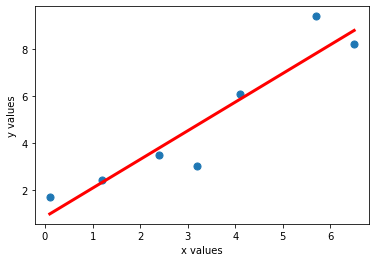

In [34]:
plt.scatter(x_1,y_1,s=50)
plt.plot(x_1,regr.predict(x_1),color='red',linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [35]:
# yhat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_1
print('Est. values y_hat are: \n',y_hat)
print('Original values: \n',y_1)

Est. values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Original values: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [36]:
# Function implementation

def mse(y,y_hat):
    mse_calc = 1/y.size * sum((y-y_hat)**2)
    #mse_calc = np.average((y-y_hat)**2,axis =0) #Alternative method by using .average
    return mse_calc

In [38]:
# Comparison using fcn vs. in-built function

print('MSE is :',mse(y_1,y_hat))
print('MSE regression using fcn :',mean_squared_error(y_1,y_hat))
print('MSE regression is :', mean_squared_error(y_1,regr.predict(x_1)))

MSE is : [0.94796558]
MSE regression using fcn : 0.9479655759794577
MSE regression is : 0.9479655759794577


# Plotting - MSE Cost function

In [51]:
nr_thetas = 200
th_0 = np.linspace(start=-1,stop=3,num=nr_thetas)
th_1 = np.linspace(start=-1,stop=3,num=nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0,th_1)


In [52]:
plot_cost = np.zeros((nr_thetas,nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_1
        plot_cost[i][j] = mse(y_1,y_hat)


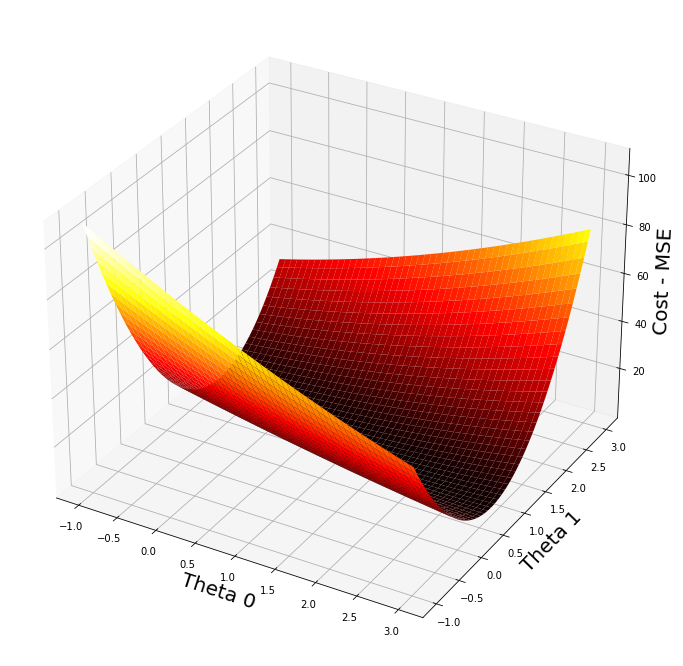

In [56]:
# Graph generation

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)
plt.show()

In [64]:
print('Min value: ',plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(),shape=plot_cost.shape)
print('Min. occurs at: ', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]',plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t0[111][91]',plot_t1[111][91])

Min value:  0.9483826526747163
Min. occurs at:  (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t0[111][91] 1.2311557788944723


## Partial Derivatives of MSE - $\theta_0$ and $\theta_1$

In [67]:
# MSE & Gradient Descent

def grad(x,y,thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y-thetas[0]-thetas[1]*x)
    theta0_slope = (-2/n) * sum((y-thetas[0]-thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0]],theta1_slope[0])
    #return np.append(arr=theta0_slope,values=theta1_slope)
    return np.concatenate((theta0_slope,theta1_slope),axis=0)

In [ ]:
multiplier